In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import qutip as qt
# from helpers import *

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def phase_fluctuation(Ec, Ej): 
    """
    Calculate the phase fluctuation for a given set of parameters.
    
    Parameters:
    Ec (float): Charging energy.
    Ej (float): Josephson energy.
    
    Returns:
    float: Phase fluctuation.
    """
    return np.sqrt(Ec / Ej)

# Old Coupler

In [36]:
class dds(): 
    """
    Class to handle the dynamics of a driven dissipative system.
    """
    def __init__(self, Ec, Ej ):
        self.Ec = Ec
        self.Ej = Ej
        # self.N = N
        # self.tlist = tlist if tlist is not None else np.linspace(0, 10, 100)
        self.phi_fluctuation = phase_fluctuation(Ec, Ej)
    
    # def compute_dynamics(self):
    #     """
    #     Compute the dynamics of the system.
    #     """
    #     # Placeholder for actual dynamics computation
    #     return np.random.rand(len(self.tlist)) * self.phi_fluctuation

In [38]:
dds_instance = dds(Ec=60 * 2 * np.pi, 
                   Ej=25113.06625310054 * 2 * np.pi)

In [33]:
ec = 60 #* 2 * np.pi
ej = 2e3#25113.06625310054 #* 2 * np.pi
# frequency = np.sqrt(8 * ec * ej)
def frequency(ec, ej):
    """
    Calculate the frequency based on charging and Josephson energies.
    
    Parameters:
    ec (float): Charging energy.
    ej (float): Josephson energy.
    
    Returns:'
    float: Frequency in Hz.
    """
    return np.sqrt(8 * ec * 2*ej)
freq = frequency(ec, ej)
print(f"Frequency: {freq / (1)} Hz")


Frequency: 1385.6406460551018 Hz


In [31]:
Ec = 60 * 2 * np.pi # mhz (anaharmonicity)
omega = 4.0e3 * 2 * np.pi # mhz (frequency of the oscillator)
dc_component = np.cos(0.269 * np.pi) # dc component of the drive
El = 0#50e3 * 2 * np.pi # mhz (inductive energy)
Ej = (omega**2 / (8 * Ec ) - El)/dc_component/2/np.pi/2 # Josephson energy
Ej

25113.06625310054

In [29]:
phase_fluctuation_a = phase_fluctuation(Ec, Ej*dc_component)
print(f"Phase fluctuation: {phase_fluctuation_a:.2f} ")

Phase fluctuation: 0.15 


In [30]:
g21 = Ej/2 * phase_fluctuation_a * np.sin(0.269 * np.pi)
print(f"g21: {g21:.2f} MHz")

g21: 1412.63 MHz


# LINC

In [41]:
class linc(): 
    def __init__(self, Ec, Ej, El):
        self.Ec = Ec
        self.Ej = Ej
        self.El = El
        # self.omega = omega
        # self.g21 = g21


    def __repr__(self):
        return f"linc(Ec={self.Ec}, Ej={self.Ej}"
    def __str__(self):
        return f"linc with Ec={self.Ec}, Ej={self.Ej}"
    
    

In [43]:
Ec = 60 * 2 * np.pi # mhz (anaharmonicity)
El = 35e3 * 2 * np.pi # mhz (Josephson energy)
Ej = 10e3 * 2 * np.pi # mhz (inductive energy)
linc_instance = linc(Ec=Ec, Ej=Ej, El=El)

In [21]:
Ec = 60 * 2 * np.pi # mhz (anaharmonicity)
El = 35e3 * 2 * np.pi # mhz (Josephson energy)
Ej = 10e3 * 2 * np.pi # mhz (inductive energy)
dc_component = np.cos(np.pi/2) # dc component of the drive
omega = np.sqrt(8 * Ec * (El + 2*Ej*dc_component))  # mhz (frequency of the oscillator)
print(f"omega = {omega/2/np.pi:.2f} MHz")

omega = 4098.78 MHz


In [22]:
# phase fluctuation at dc point = pi/2
phase_fluctuation_b = np.sqrt(2 * Ec / El)
print(f"Phase fluctuation at pi/2: {phase_fluctuation_b:.2f} ")

Phase fluctuation at pi/2: 0.06 


In [24]:
# g21 
g21 = Ej/2 * phase_fluctuation_b
print(f"g21 = {g21/2/np.pi:.2f} MHz")

g21 = 292.77 MHz


In [ ]:
effective_Ej = 2* Ej * 0*dc_component
alpha = effective_Ej / (El + 2 * effective_Ej )
print(f"alpha = {alpha:.2f}")

alpha = 0.00


In [ ]:
omega**2 / (8 * Ec )/2/ np.pi 

20000.000000000004

# Strength of 4 w.m. vs 3 w.. 
## DDS
### 3 w. m. 
<!-- $g{1,2} = 2E_J *\sqrt{\frac{E_C}{E_J cos\phi}} sin \phi$ -->
$𝑔[𝜙_{𝐷𝐶} ]=𝜔_{𝑎𝑟𝑟}  𝐭𝐚𝐧⁡〖𝝓_{𝑫𝑪} 〗  ×𝜙_𝑑$



### 4 w. m.
<!-- $g_{2,2} = 2E_J *\sqrt{\frac{E_C}{E_J cos\phi}} * \frac{1}{4} (\frac{cos^2\phi + 1}{cos\phi}) $ -->

$$𝑔[𝜙_𝐷𝐶 ]=𝜔_{𝑎𝑟𝑟}  𝟏/(𝟖√𝟖 ) (𝟏+𝟏/(𝐜𝐨𝐬⁡(𝝓_{𝑫𝑪} ) )^𝟐 )×𝜙_𝐷^2$$

## LINC
### 3 w. m.
<!-- $g{1,2} = 2E_J *\sqrt{\frac{2E_C}{E_L + 2 E_J cos\phi}} sin \phi$ -->
$𝑔[𝜋/2]=𝑬_𝑱/(𝟐𝑬_𝑳 ) 𝜔_𝐿  〖×𝜙〗_𝑑 $


### 4 w. m. 
<!-- $g{2,2} = 2E_J *\sqrt{\frac{2E_C}{E_L + 2 E_J cos\phi}} * \frac{1}{4} (\frac{cos^2\phi + 1}{cos\phi})$ -->

$𝑔[𝜋/2]=(𝑬_𝑱/(𝟐𝑬_𝑳 ))^𝟐  𝜔_𝐿  ×𝜙_𝑑^2 $






In [70]:
# Define the g formulas for DDS and LINC
def g_dds_3wm_formula(alpha, phi):
    """
    Calculate g for 3-wave mixing (DDS) with omega and phi_d set to 1.

    Formula:
    g = omega * tan(phi) * phi_d

    Parameters:
    alpha (float): Ratio of energies (2 * Ej / El).
    phi (float): Phase.

    Returns:
    float: g for 3-wave mixing (DDS).
    """
    return np.tan(phi)

def g_dds_4wm_formula(alpha, phi):
    """
    Calculate g for 4-wave mixing (DDS) with omega and phi_d set to 1.

    Formula:
    g = omega * (1 / (8 * sqrt(8))) * (1 + 1 / cos(phi)^2) * phi_d^2

    Parameters:
    alpha (float): Ratio of energies (2 * Ej / El).
    phi (float): Phase.

    Returns:
    float: g for 4-wave mixing (DDS).
    """
    return (1 / (8 * np.sqrt(8))) * (1 + 1 / (np.cos(phi)**2))

def g_linc_3wm_formula(alpha, phi):
    """
    Calculate g for 3-wave mixing (LINC) with omega and phi_d set to 1.

    Formula:
    g = (Ej / (2 * El)) * omega * phi_d

    Parameters:
    alpha (float): Ratio of energies (2 * Ej / El).
    phi (float): Phase.

    Returns:
    float: g for 3-wave mixing (LINC).
    """
    return (alpha / 2) #* np.sin(phi)

def g_linc_4wm_formula(alpha, phi):
    """
    Calculate g for 4-wave mixing (LINC) with omega and phi_d set to 1.

    Formula:
    g = (Ej / (2 * El))^2 * omega * phi_d^2

    Parameters:
    alpha (float): Ratio of energies (2 * Ej / El).
    phi (float): Phase.

    Returns:
    float: g for 4-wave mixing (LINC).
    """
    return (alpha**2 / 16) #* (1 + 1 / (np.cos(phi)**2))



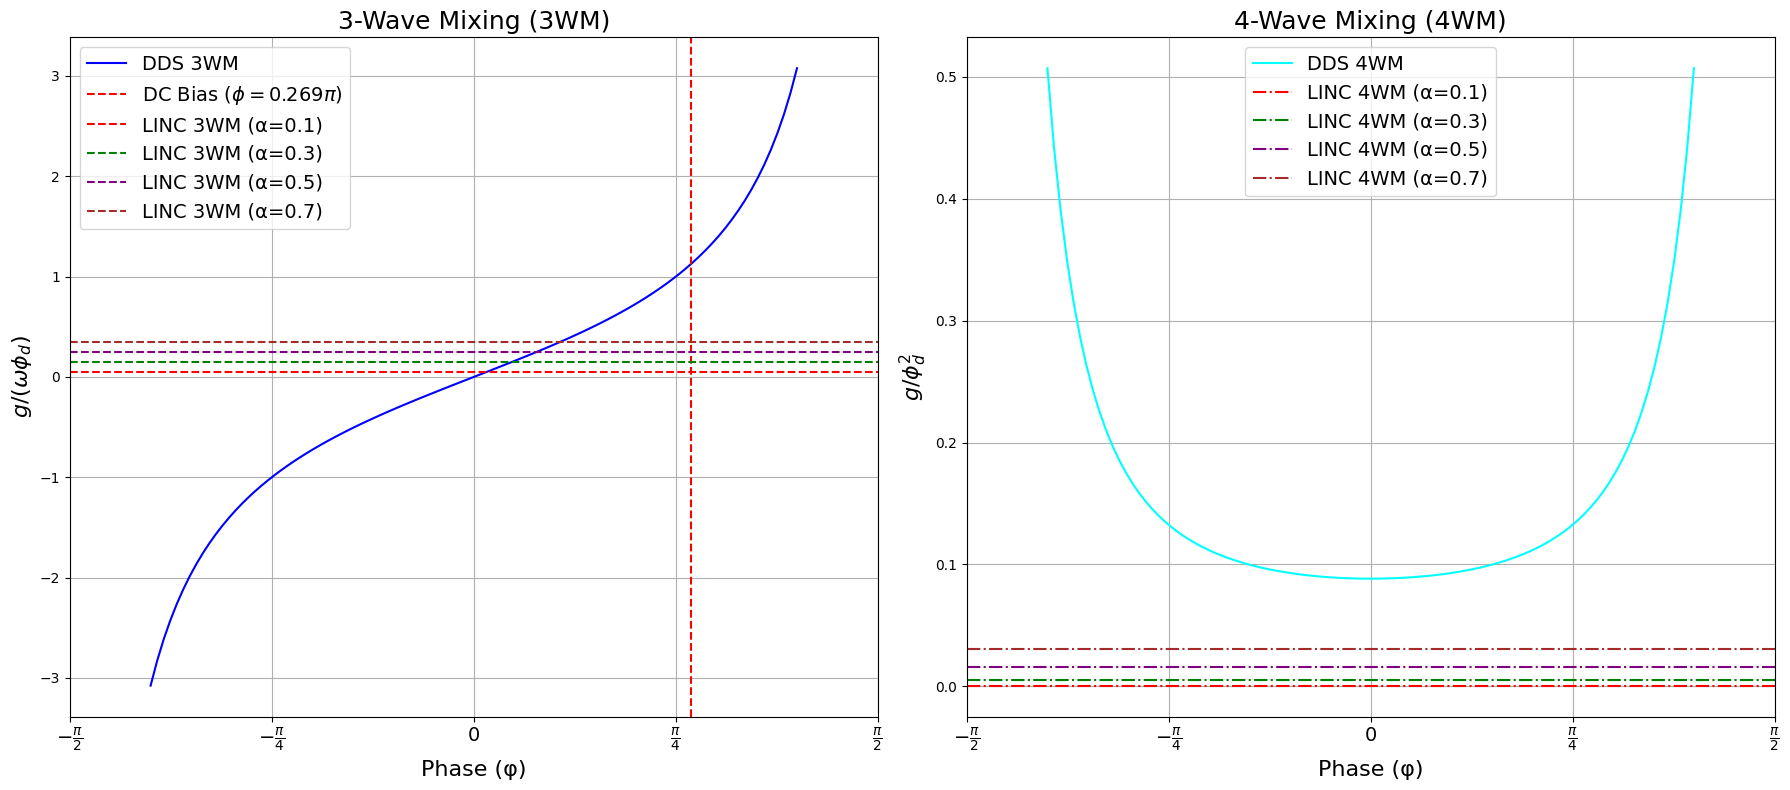

In [78]:
# Define phase range
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # Side by side plots
phi_list = np.linspace(-np.pi / 2, np.pi / 2, 100) * 0.8
alpha_values = [0.1, 0.3, 0.5, 0.7]  # Different alpha values for LINC

# DDS 3-wave mixing
dds_3wm_values = g_dds_3wm_formula(1, phi_list) #/ (omega * 1)  # Normalize by omega * phi_d
axs[0].plot(phi_list, dds_3wm_values, label='DDS 3WM', color='blue')
axs[0].axvline(0.269 * np.pi, color='red', linestyle='--', label=r'DC Bias ($\phi = 0.269\pi$)')  # Line at 0.269 pi
# LINC 3-wave mixing (horizontal lines with different colors)
colors_3wm = ['red', 'green', 'purple', 'brown']
for alpha, color in zip(alpha_values, colors_3wm):
    linc_3wm_value = g_linc_3wm_formula(alpha, 0) #/ (omega * 1)  # Normalize by omega * phi_d
    axs[0].axhline(linc_3wm_value, linestyle='--', color=color, label=f'LINC 3WM (α={alpha})')

# Format 3WM plot
axs[0].set_xticks(np.arange(-np.pi / 2, np.pi / 2 + 0.1, np.pi / 4))
axs[0].set_xticklabels([r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$'], fontsize=14)
axs[0].set_xlabel('Phase (φ)', fontsize=16)
axs[0].set_ylabel(r'$g / (\omega \phi_d)$', fontsize=16)
axs[0].set_title('3-Wave Mixing (3WM)', fontsize=18)
axs[0].legend(fontsize=14)
axs[0].grid()

# DDS 4-wave mixing
dds_4wm_values = g_dds_4wm_formula(1, phi_list) #/ (1**2)  # Normalize by phi_d^2
axs[1].plot(phi_list, dds_4wm_values, label='DDS 4WM', color='cyan')
# LINC 4-wave mixing (horizontal lines with different colors)
colors_4wm = ['red', 'green', 'purple', 'brown']
for alpha, color in zip(alpha_values, colors_4wm):
    linc_4wm_value = g_linc_4wm_formula(alpha, 0) #/ (1**2)  # Normalize by phi_d^2
    axs[1].axhline(linc_4wm_value, linestyle='-.', color=color, label=f'LINC 4WM (α={alpha})')

# Format 4WM plot
axs[1].set_xticks(np.arange(-np.pi / 2, np.pi / 2 + 0.1, np.pi / 4))
axs[1].set_xticklabels([r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$'], fontsize=14)
axs[1].set_xlabel('Phase (φ)', fontsize=16)
axs[1].set_ylabel(r'$g / \phi_d^2$', fontsize=16)
axs[1].set_title('4-Wave Mixing (4WM)', fontsize=18)
axs[1].legend(fontsize=14)
axs[1].grid()

plt.tight_layout()
plt.show()


In [69]:
g_linc_3wm_formula(alpha, phi_list)

0.05

$g{1,2} = 2E_J *\sqrt{\frac{2E_C}{E_L + 2 E_J cos\phi}} sin \phi$
$$\frac{\partial g{1,2}}{\partial \phi} = 2E_J *\sqrt{\frac{2E_C}{E_L + 2 E_J cos\phi}} \left(\frac{E_J( 1 + cos^2\phi)  + E_L cos\phi}{2(E_L + 2E_Jcos\phi)}\right)$$


In [32]:
def g_dds_3wm(Ej, Ec, phi):
    """
    Calculate g for 3-wave mixing (DDS).

    Formula:
    g = 2 * E_J * sqrt(E_C / (E_J * cos(φ))) * sin(φ)

    Parameters:
    Ej (float): Josephson energy.
    Ec (float): Charging energy.
    phi (float): Phase.

    Returns:
    float: g for 3-wave mixing (DDS).
    """
    return 2 * Ej * np.sqrt(Ec / (Ej * np.cos(phi))) * np.sin(phi)


def g_dds_4wm(Ej, Ec, phi):
    """
    Calculate g for 4-wave mixing (DDS).

    Formula:
    g = 2 * E_J * sqrt(E_C / (E_J * cos(φ))) * (1 / 4) * ((cos^2(φ) + 1) / cos(φ))

    Parameters:
    Ej (float): Josephson energy.
    Ec (float): Charging energy.
    phi (float): Phase.

    Returns:
    float: g for 4-wave mixing (DDS).
    """
    return 2 * Ej * np.sqrt(Ec / (Ej * np.cos(phi))) * (1 / 4) * ((np.cos(phi)**2 + 1) / np.cos(phi))


def g_linc_3wm(Ej, Ec, El, phi):
    """
    Calculate g for 3-wave mixing (LINC).

    Formula:
    g = 2 * E_J * sqrt(2 * E_C / (E_L + 2 * E_J * cos(φ))) * sin(φ)

    Parameters:
    Ej (float): Josephson energy.
    Ec (float): Charging energy.
    El (float): Inductive energy.
    phi (float): Phase.

    Returns:
    float: g for 3-wave mixing (LINC).
    """
    return 2 * Ej * np.sqrt(2 * Ec / (El + 2 * Ej * np.cos(phi))) * np.sin(phi)


def g_linc_4wm(Ej, Ec, El, phi):
    """
    Calculate g for 4-wave mixing (LINC).

    Formula:
    g = 2 * E_J * sqrt(2 * E_C / (E_L + 2 * E_J * cos(φ))) * (1 / 4) * ((cos^2(φ) + 1) / cos(φ))

    Parameters:
    Ej (float): Josephson energy.
    Ec (float): Charging energy.
    El (float): Inductive energy.
    phi (float): Phase.

    Returns:
    float: g for 4-wave mixing (LINC).
    """
    return 2 * Ej * np.sqrt(2 * Ec / (El + 2 * Ej * np.cos(phi))) * (1 / 4) * ((np.cos(phi)**2 + 1) / np.cos(phi))

# Flux Noise Sensitivity

Update 250725: there is something wrong with E_J; for is ej energy of single or double; currently looks like double
## DDS
$\omega = \sqrt{8E_CE_Jcos{\phi}}$
$$\frac{\partial \omega}{\partial \phi} = -\frac{1}{2} \sqrt{\frac{8E_CE_J}{\cos{\phi}}} \sin{\phi}$$
$$\frac{1}{\omega} \frac{\partial \omega}{\partial \phi} = -\frac{\sin{\phi}}{2 \cos{\phi}}$$

## LINC
$\omega = \sqrt{8E_C (E_L + 2E_J cos\phi})$

$$\frac{\partial \omega}{\partial \phi} = \frac{8E_CE_J\sin{\phi}}{2\sqrt{8E_C(E_L + 2E_J\cos{\phi})}}$$  
$$\frac{1}{\omega} \frac{\partial \omega}{\partial \phi} = \frac{E_J\sin{\phi}}{E_L + 2E_J\cos{\phi}}$$

$\alpha = \frac{2E_J}{E_L}$  
$$\frac{1}{\omega} \frac{\partial \omega}{\partial \phi} = \frac{\alpha \sin{\phi}}{2(1 + \alpha \cos{\phi})}$$

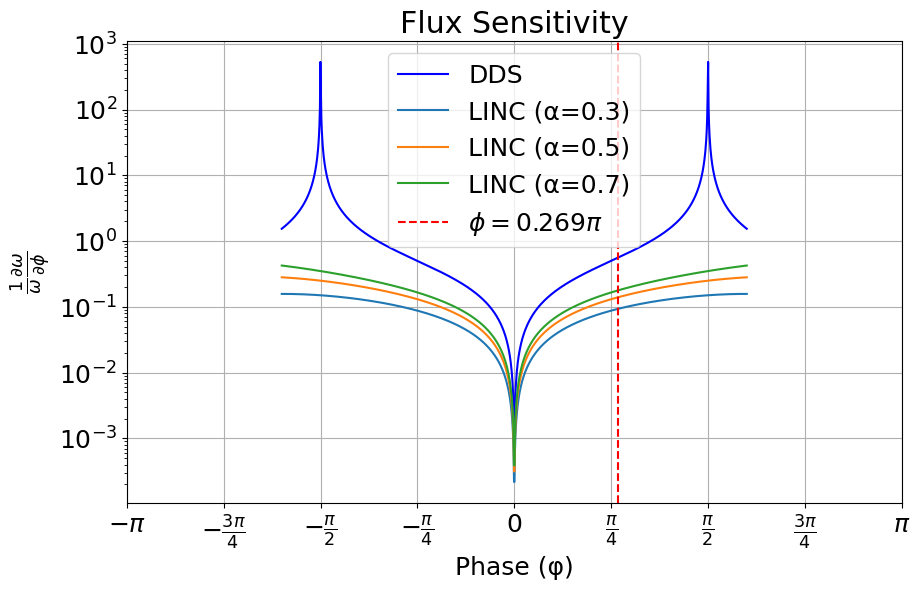

In [86]:
# Define the flux sensitivity functions for DDS and LINC
def flux_sensitivity_dds(phi):
    """
    Calculate 1/omega * derivative of omega with respect to phi for DDS.

    Formula:
    (1/omega) * (dω/dφ) = -sin(φ) / (2 * cos(φ))

    Parameters:
    phi (float): Phase.

    Returns:
    float: 1/omega * derivative for DDS.
    """
    return -np.sin(phi) / (2 * np.cos(phi))


def flux_sensitivity_linc(alpha, phi):
    """
    Calculate 1/omega * derivative of omega with respect to phi for LINC.

    Formula:
    (1/omega) * (dω/dφ) = (α * sin(φ)) / (2 + α * cos(φ))

    Parameters:
    alpha (float): Ratio of energies (2 * Ej / El).
    phi (float): Phase.

    Returns:
    float: 1/omega * derivative for LINC.
    """
    return (alpha * np.sin(phi)) / (2*(1 + alpha * np.cos(phi)))

plt.rcParams.update({'font.size': 18})  # Update font size for all text elements
# Plot the results
phi_list = np.linspace(-np.pi, np.pi, 1000)*0.6  # Phase range from -π to π

# DDS
flux_sensitivity_dds_values = np.abs(flux_sensitivity_dds(phi_list))

# LINC for different alpha values
alpha_values = [0.3, 0.5, 0.7]  # Different alpha values
plt.figure(figsize=(10, 6))
plt.plot(phi_list, flux_sensitivity_dds_values, label='DDS', color='blue')

for alpha in alpha_values:
    flux_sensitivity_linc_values = np.abs(flux_sensitivity_linc(alpha, phi_list))
    plt.plot(phi_list, flux_sensitivity_linc_values, label=f'LINC (α={alpha})')

# Format the plot
plt.axvline(x=0.269 * np.pi, color='red', linestyle='--', label=r'$\phi = 0.269\pi$')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xticks(np.arange(-np.pi, np.pi + 0.1, np.pi / 4), 
           [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', 
            r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'])
plt.xlabel('Phase (φ)')
plt.ylabel(r'$\frac{1}{\omega} \frac{\partial \omega}{\partial \phi}$')
plt.title('Flux Sensitivity')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()


# Flux Noise Insensitivity 
## DDS
$$ \frac{\partial g }{\partial \phi} = 2E_J *\sqrt{\frac{E_C}{E_J cos\phi}} \left( \frac{cos^2\phi + 1}{2 (cos \phi)}\right)$$
## LINC
$$\frac{\partial g }{\partial \phi} = 2E_J *\sqrt{\frac{2E_C}{E_L + 2 E_J cos\phi}} \left(\frac{E_J( 1 + cos^2\phi)  + E_L cos\phi}{2(E_L + 2E_Jcos\phi)}\right)$$

In [33]:
def flux_noise_insensitivity_dds(Ej, Ec, phi):
    """
    Calculate the flux noise insensitivity for DDS.

    Formula:
    ∂g/∂φ = 2 * E_J * sqrt(E_C / (E_J * cos(φ))) * (cos^2(φ) + 1) / (2 * (cos(φ))^(3/2))

    Parameters:
    Ej (float): Josephson energy.
    Ec (float): Charging energy.
    phi (float): Phase.

    Returns:
    float: Flux noise insensitivity for DDS.
    """
    return 2 * Ej * np.sqrt(Ec / (Ej * np.cos(phi))) * ((np.cos(phi)**2 + 1) / (2 * (np.cos(phi)**(3/2))))


def flux_noise_insensitivity_linc(Ej, Ec, El, phi):
    """
    Calculate the flux noise insensitivity for LINC.

    Formula:
    ∂g/∂φ = 2 * E_J * sqrt(2 * E_C / (E_L + 2 * E_J * cos(φ))) * 
            ((E_J * (1 + cos^2(φ)) + E_L * cos(φ)) / (E_L + 2 * E_J * cos(φ)))

    Parameters:
    Ej (float): Josephson energy.
    Ec (float): Charging energy.
    El (float): Inductive energy.
    phi (float): Phase.

    Returns:
    float: Flux noise insensitivity for LINC.
    """
    return 2 * Ej * np.sqrt(2 * Ec / (El + 2 * Ej * np.cos(phi))) * \
           ((Ej * (1 + np.cos(phi)**2) + El * np.cos(phi)) / (El + 2 * Ej * np.cos(phi)))

/var/folders/qv/2zlrl3v97s9_ht7wrdl_fgp00000gn/T/ipykernel_98516/1569499033.py:16: RuntimeWarning: invalid value encountered in sqrt
  return 2 * Ej * np.sqrt(Ec / (Ej * np.cos(phi))) * ((np.cos(phi)**2 + 1) / (2 * (np.cos(phi)**(3/2))))
/var/folders/qv/2zlrl3v97s9_ht7wrdl_fgp00000gn/T/ipykernel_98516/1569499033.py:16: RuntimeWarning: invalid value encountered in power
  return 2 * Ej * np.sqrt(Ec / (Ej * np.cos(phi))) * ((np.cos(phi)**2 + 1) / (2 * (np.cos(phi)**(3/2))))


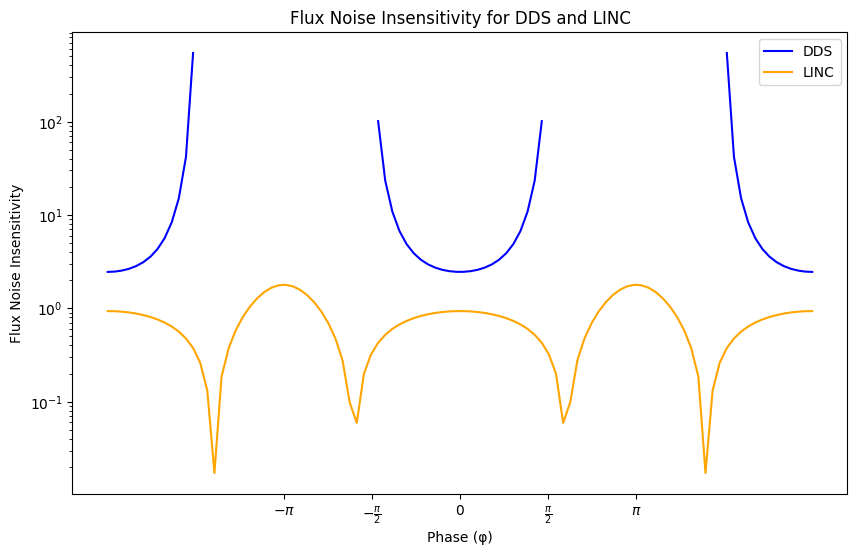

In [56]:
phi_list = np.linspace(-1, 1, 100) * 2 * np.pi  # Phase range from -π to π
# plot the flux noise insensitivity for DDS and LINC
plt.figure(figsize=(10, 6))
plt.plot(phi_list, np.abs(flux_noise_insensitivity_dds(dds_instance.Ej, dds_instance.Ec, phi_list))/2/np.pi/1e3, label='DDS', color='blue')
plt.plot(phi_list, np.abs(flux_noise_insensitivity_linc(linc_instance.Ej, linc_instance.Ec, linc_instance.El, phi_list))/2/np.pi/1e3, label='LINC', color='orange')
#make sure x ticks are in units of pi
plt.xticks(np.arange(-np.pi, np.pi + 0.1, np.pi/2), 
           [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.xlabel('Phase (φ)')
plt.ylabel('Flux Noise Insensitivity')
plt.title('Flux Noise Insensitivity for DDS and LINC')
plt.yscale('log')
plt.legend()


/var/folders/qv/2zlrl3v97s9_ht7wrdl_fgp00000gn/T/ipykernel_98516/2639930237.py:16: RuntimeWarning: invalid value encountered in sqrt
  return 2 * Ej * np.sqrt(Ec / (Ej * np.cos(phi))) * np.sin(phi)
/var/folders/qv/2zlrl3v97s9_ht7wrdl_fgp00000gn/T/ipykernel_98516/1569499033.py:16: RuntimeWarning: invalid value encountered in power
  return 2 * Ej * np.sqrt(Ec / (Ej * np.cos(phi))) * ((np.cos(phi)**2 + 1) / (2 * (np.cos(phi)**(3/2))))


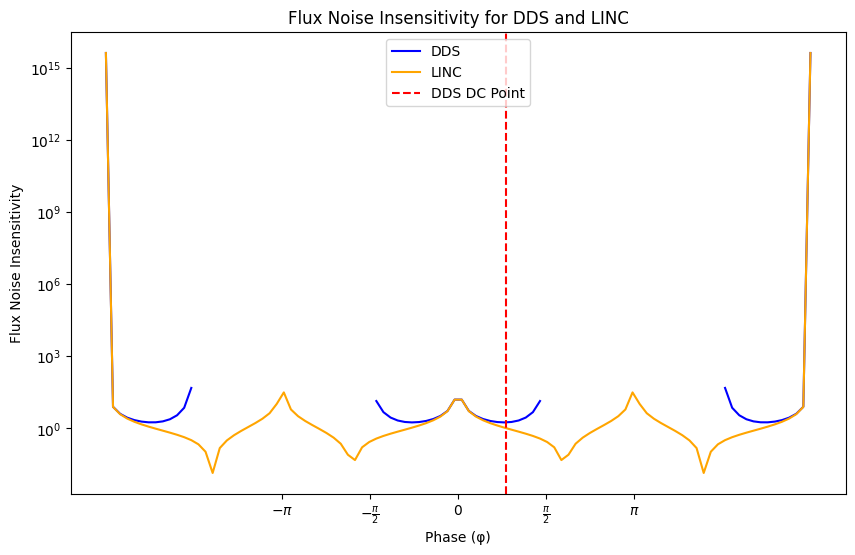

In [55]:
phi_list = np.linspace(-1, 1, 100) * 2 * np.pi  # Phase range from -π to π
# plot the flux noise insensitivity for DDS and LINC
g_dds_3wm_values = g_dds_3wm(dds_instance.Ej, dds_instance.Ec, phi_list)
g_linc_3wm_values = g_linc_3wm(linc_instance.Ej, linc_instance.Ec, linc_instance.El, phi_list)

flux_noise_insensitivity_dds_normalized = np.abs(flux_noise_insensitivity_dds(dds_instance.Ej, dds_instance.Ec, phi_list)) / g_dds_3wm_values
flux_noise_insensitivity_linc_normalized = np.abs(flux_noise_insensitivity_linc(linc_instance.Ej, linc_instance.Ec, linc_instance.El, phi_list)) / g_linc_3wm_values
plt.figure(figsize=(10, 6))
plt.plot(phi_list, np.abs(flux_noise_insensitivity_dds_normalized ), label='DDS', color='blue')
plt.plot(phi_list, np.abs(flux_noise_insensitivity_linc_normalized), label='LINC', color='orange')
#make sure x ticks are in units of pi
plt.xticks(np.arange(-np.pi, np.pi + 0.1, np.pi/2), 
           [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.axvline(x = 0.269 * np.pi, color='red', linestyle='--', label='DDS DC Point')
plt.xlabel('Phase (φ)')
plt.ylabel('Flux Noise Insensitivity')
plt.title('Flux Noise Insensitivity for DDS and LINC')
plt.yscale('log')
plt.legend()


In [53]:
flux_noise_insensitivity_dds(dds_instance.Ej, dds_instance.Ec, 0.269 * np.pi) / g_dds_3wm(dds_instance.Ej, dds_instance.Ec, 0.269 * np.pi)

1.7808453661165644

# Low Frequency Noise Caluclation (07/25/25)

$$\frac{\partial \omega_{\text{res}}}{\partial \phi} = -\frac{1}{2} \sqrt{\frac{8E_CE_J}{\cos{\phi}}} \sin{\phi} \times \left(\frac{g}{\Delta}\right)^2$$

$$
    \frac{\partial \omega_{\text{res}}}{\partial \Phi} = \frac{\pi}{\Phi_0} \left(-\frac{1}{2}\right) \omega_{\text{coupler}} \left(\frac{g}{\Delta}\right)^2 \frac{\sin{\phi}}{\sqrt{\cos{\phi}}}
    $$

where $\phi = \phi_{DC}$ is the DC point and $\Phi_0$ is the flux quantum

Now 
$$\kappa_{\phi} = \sqrt{ \left(\frac{\partial \omega_{\text{res}}}{\partial \Phi} \right)^2 \int_0^\infty S_{\Phi\Phi}[f]g_N[f_\tau]df}$$

We can further simplify 
$$\sqrt{\int_0^\infty S_{\Phi\Phi}[f]g_N[f_\tau]df} = A_{\Phi}C$$
where $C = 3-5$


In [19]:
def kappa_phi(phi, omega_coupler, g, Delta, Phi_0, A_Phi, C):
    """
    Calculate $\kappa_{\phi}$, the low frequency noise sensitivity.

    Formula:
    $$
    \kappa_{\phi} = \sqrt{ \left(\frac{\partial \omega_{\text{res}}}{\partial \Phi} \right)^2 \int_0^\infty S_{\Phi\Phi}[f]g_N[f_\tau]df}
    $$
    where
    $$
    \frac{\partial \omega_{\text{res}}}{\partial \Phi} = \frac{\pi}{\Phi_0} \left(-\frac{1}{2}\right) \omega_{\text{coupler}} \left(\frac{g}{\Delta}\right)^2 \frac{\sin{\phi}}{\sqrt{\cos{\phi}}}
    $$
    and
    $$
    \sqrt{\int_0^\infty S_{\Phi\Phi}[f]g_N[f_\tau]df} = A_{\Phi}C
    $$

    Parameters:
    phi (float): DC phase point.
    omega_coupler (float): Coupler frequency.
    g (float): Coupling strength.
    Delta (float): Detuning.
    Phi_0 (float): Flux quantum.
    A_Phi (float): Flux noise amplitude.
    C (float): Numerical factor (typically 3-5).

    Returns:
    float: $\kappa_{\phi}$ value.
    """
    d_omega_res_d_Phi = (np.pi / Phi_0) * (-0.5) * omega_coupler * (g / Delta)**2 * (np.sin(phi) / np.sqrt(np.cos(phi)))
    # d_omega_res_d_Phi =  (-0.5) * omega_coupler * (g / Delta)**2 * (np.sin(phi) / np.sqrt(np.cos(phi)))
    
    print((np.sin(phi) / np.sqrt(np.cos(phi))))
    return np.abs(d_omega_res_d_Phi) * A_Phi * C


<>:2: SyntaxWarning: invalid escape sequence '\k'
<>:2: SyntaxWarning: invalid escape sequence '\k'
/var/folders/qv/2zlrl3v97s9_ht7wrdl_fgp00000gn/T/ipykernel_89166/3937533495.py:2: SyntaxWarning: invalid escape sequence '\k'
  """


In [25]:
kappa_phi_ = kappa_phi(phi = 0.269 * np.pi,
          omega_coupler = 4.0e9 * 2 * np.pi,  # Hz
          g = 1.0,  # Coupling strength Ghz
          Delta = 1.0,  # Detuning
          Phi_0 = 1,  # Flux quantum in Wb
          A_Phi = 1e-6,  # Amplitude of flux noise in phi_0
          C = 5)  # Numerical factor
print(f"kappa_phi = {kappa_phi_*1e-3:.2e} kHz")
# convert to time 
kappa_phi_time = 1 / kappa_phi_
print(f"kappa_phi_time = {kappa_phi_time*1e6:.2e} mus")

0.9182150258809608
kappa_phi = 1.81e+02 kHz
kappa_phi_time = 5.52e+00 mus


In [27]:
ramsey_time = 0.3 *1e-6
echo_time = 48  * 1e-6
# find the low frequency noise by kappa_low_freq = kappa_ramsey - kappa_echo 
kappa_ramsey = 1 / ramsey_time
kappa_echo = 1 / echo_time
kappa_low_freq = kappa_ramsey - kappa_echo
print(f"kappa_low_freq = {kappa_low_freq*1e-3:.2e} kHz")
# convert to time
kappa_low_freq_time = 1 / kappa_low_freq
print(f"kappa_low_freq_time = {kappa_low_freq_time*1e6:.2e} mus")

kappa_low_freq = 3.31e+03 kHz
kappa_low_freq_time = 3.02e-01 mus
